In [1]:
# Import in packages
import pandas as pd
import numpy as np
import os
#from requests_html import HTMLSession
from time import sleep
import datetime
import bisect
import glob

In [2]:
# setting the path for joining multiple files
files = os.path.join(r"C:\Users\Kelvin\Documents\GitHub\internet_outages\data", 'nyt*.csv')

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
nyt_body = pd.concat(map(pd.read_csv, files), ignore_index=True)

Resultant CSV after joining all CSV files at a particular location...


In [3]:
# Reading in NYT & Guardian Data
nyt_body = pd.read_csv('nyt_body.csv')
nyt_body = nyt_body.drop(columns = ['keywords', 'Unnamed: 0', 'Unnamed: 0.1']).rename(columns={'url': 'link'})
guardian_body = pd.read_csv('guardian_body.csv').drop(columns=['Unnamed: 0'])
complete = pd.concat([guardian_body, nyt_body]).dropna(subset=['body']).reset_index(drop=True)
complete['date'] = pd.to_datetime(complete['date'])
complete['region'] = complete['region'].replace({'Asia': 'Southeast Asia'})
complete

,link,title,country,region,date,lead_par,body
0,https://www.theguardian.com/football/live/2022...,Algeria 0-1 Equatorial Guinea: Africa Cup of N...,Algeria,Middle East,2022-01-16 21:02:24+00:00,Esteban Obiang’s second-half goal delivered a ...,Esteban Obiang’s second-half goal delivered a ...
1,https://www.theguardian.com/football/blog/2022...,Afcon exits of Algeria and Ghana a shock but t...,Algeria,Middle East,2022-01-22 20:00:02+00:00,Debutants Comoros and the Gambia reaching the ...,Debutants Comoros and the Gambia reaching the ...
2,https://www.theguardian.com/world/2021/sep/30/...,Macron in visa cuts row as Algeria summons Fre...,Algeria,Middle East,2021-09-30 16:17:29+00:00,President accused of chasing rightwing votes b...,President accused of chasing rightwing votes b...
3,https://www.theguardian.com/environment/2021/a...,Leaded petrol era ‘officially over’ as Algeria...,Algeria,Middle East,2021-08-30 14:06:07+00:00,UN announcement marks ‘huge milestone for glob...,UN announcement marks ‘huge milestone for glob...
4,https://www.theguardian.com/football/2022/mar/...,Mané’s laser-guided penalty lights up Africa’s...,Algeria,Middle East,2022-03-30 10:10:37+00:00,Egypt’s qualifying defeat was marred by Senega...,Egypt’s qualifying defeat was marred by Senega...
...,...,...,...,...,...,...,...
114791,https://www.nytimes.com/2022/03/29/well/mind/t...,Tips and tricks to get help now.,NaN,Southeast Asia,2022-03-29 15:15:26+00:00,Finding a therapist — let alone one who is a g...,Advertisement Supported by Tips and tricks to ...
114792,https://www.nytimes.com/2022/03/29/movies/will...,One stretch of the broadcast featured a remark...,NaN,Southeast Asia,2022-03-29 16:47:19+00:00,This pandemic is still killing us. The virus a...,Advertisement Supported by critic’s notebook O...
114793,https://www.nytimes.com/2022/03/29/technology/...,While India and Russia have long had close tie...,NaN,Southeast Asia,2022-03-29 17:13:13+00:00,In the days after Russia’s invasion of Ukraine...,Advertisement Supported by While India and Rus...
114794,https://www.nytimes.com/2022/03/29/health/ba2-...,"Scientists have been keeping an eye on BA.2, o...",NaN,Southeast Asia,2022-03-29 19:49:18+00:00,The highly contagious Omicron subvariant known...,Advertisement By Adeel Hassan The highly conta...


In [4]:
# Reading in IODA data
ioda = pd.read_csv('data_aft2015.csv').drop(columns=['Unnamed: 12'])
ioda['start'] = ioda['start'].apply(lambda x: datetime.datetime.fromtimestamp(x))
ioda['duration'] = ioda['duration'].apply(lambda x: datetime.timedelta(seconds=x))

# Get countries of interest
countries_sea = ['Brunei', 'Myanmar', 'Cambodia', 'Timor-Leste', 'Indonesia', 'Laos', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']
countries_me = ['Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'Oman', 'Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen']
ioda_filtered = ioda[((ioda['location_name'].isin(countries_me)) | (ioda['location_name'].isin(countries_sea))) & (ioda['overlaps_window'] == False)].reset_index().drop(columns=['index'])
ioda_filtered['region'] = ioda_filtered['location_name'].apply(lambda x: 'Southeast Asia' if x in countries_sea else 'Middle East')
ioda_filtered = ioda_filtered.sort_values(by='start')
score_threshold = np.exp(7) - 1
ioda_filtered = ioda_filtered[ioda_filtered['score'] >= score_threshold].reset_index(drop=True)
ioda_filtered

,datasource,location,start,duration,uncertainty,status,fraction,score,location_type,location_code,location_name,overlaps_window,region
0,darknet.ucsd-nt.non-erratic.uniq_src_ip,geo.netacuity.AS.SA,2016-07-30 10:01:00,0 days 00:26:00,NaN,0,NaN,2178.253119,country,SA,Saudi Arabia,False,Middle East
1,darknet.ucsd-nt.non-erratic.uniq_src_ip,geo.netacuity.AS.SG,2016-07-30 10:01:00,0 days 00:22:00,NaN,0,NaN,1749.180328,country,SG,Singapore,False,Southeast Asia
2,darknet.ucsd-nt.non-erratic.uniq_src_ip,geo.netacuity.AS.SG,2016-07-30 11:40:00,0 days 00:18:00,NaN,0,NaN,1466.557377,country,SG,Singapore,False,Southeast Asia
3,darknet.ucsd-nt.non-erratic.uniq_src_ip,geo.netacuity.AS.SA,2016-07-30 12:09:00,0 days 00:14:00,NaN,0,NaN,1155.436720,country,SA,Saudi Arabia,False,Middle East
4,darknet.ucsd-nt.non-erratic.uniq_src_ip,geo.netacuity.AS.SG,2016-07-30 12:09:00,0 days 00:16:00,NaN,0,NaN,1287.868852,country,SG,Singapore,False,Southeast Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,bgp.v4.visibility_threshold.min_50%_ff_peer_as...,geo.netacuity.AS.YE,2022-01-20 13:55:00,3 days 13:45:00,NaN,0,NaN,475431.016043,country,YE,Yemen,False,Middle East
1600,active.ping-slash24.team-1.up_slash24_cnt,geo.netacuity.AS.YE,2022-01-20 14:00:00,4 days 01:20:00,NaN,0,NaN,127750.000000,country,YE,Yemen,False,Middle East
1601,bgp.v4.visibility_threshold.min_50%_ff_peer_as...,geo.netacuity.AS.TL,2022-01-20 19:35:00,3 days 03:05:00,NaN,0,NaN,5363.095238,country,TL,Timor-Leste,False,Southeast Asia
1602,bgp.v4.visibility_threshold.min_50%_ff_peer_as...,geo.netacuity.AS.QA,2022-01-24 00:40:00,0 days 08:00:00,NaN,0,NaN,6315.091211,country,QA,Qatar,False,Middle East


In [5]:
def bisect_left(a, x, lo=0, hi=None, *, key=None):
    """Return the index where to insert item x in list a, assuming a is sorted.
    The return value i is such that all e in a[:i] have e < x, and all e in
    a[i:] have e >= x.  So if x already appears in the list, a.insert(i, x) will
    insert just before the leftmost x already there.
    Optional args lo (default 0) and hi (default len(a)) bound the
    slice of a to be searched.
    """

    if lo < 0:
        raise ValueError('lo must be non-negative')
    if hi is None:
        hi = len(a)
    # Note, the comparison uses "<" to match the
    # __lt__() logic in list.sort() and in heapq.
    if key is None:
        while lo < hi:
            mid = (lo + hi) // 2
            if a[mid] < x:
                lo = mid + 1
            else:
                hi = mid
    else:
        while lo < hi:
            mid = (lo + hi) // 2
            if key(a[mid]) < x:
                lo = mid + 1
            else:
                hi = mid
    return lo

In [6]:
# Matching algorithm
left_most_outages = []
time_since_left = []
right_most_outages = []
time_since_right = []
for idx, article in complete.iterrows():
    article_date = article.date.to_datetime64()
    article_region = article.region
    range_dates = [article_date - pd.Timedelta(days=2), article_date + pd.Timedelta(hours = 12)]
    range_dates = [date.to_datetime64() for date in range_dates]
    # print(type(range_dates[0]))
    # break
    # Use country if possible, else just use region and try to generalize it 
    if article.country != np.NaN:
        article_country = article.country
        filtered = ioda_filtered[(range_dates[0] <= ioda_filtered['start']) &
                                 (ioda_filtered['start'] <= range_dates[1]) &
                                 (ioda_filtered['location_name'] == article_country)]
    else:
        filtered = ioda_filtered[(range_dates[0] <= ioda_filtered['start']) &
                                 (ioda_filtered['start'] <= range_dates[1]) &
                                 (ioda_filtered['region'] == article_region)]
    if filtered.shape[0] == 0:
        left_most_outages.append(np.NaN)
        right_most_outages.append(np.NaN)
        time_since_left.append(np.NaN)
        time_since_right.append(np.NaN)
        continue
    else:
        pairs = list(filtered['start'].items())
        #print(pairs)
        #break
        position = bisect_left(pairs, article_date, key = (lambda r: r[1]))
    if (position != 0) & (position != len(pairs)):
        left_most_outages.append(pairs[position][0])
        time_since_left.append(article_date - pairs[position][1])
        right_most_outages.append(pairs[position][0])
        time_since_right.append(pairs[position][1] - article_date)
    if position == 0:
        left_most_outages.append(np.NaN)
        time_since_left.append(np.NaN)
        right_most_outages.append(pairs[position][0])
        time_since_right.append(pairs[position][1] - article_date)
    else:
        left_most_outages.append(pairs[position-1][0])
        time_since_left.append(article_date - pairs[position-1][1])
        right_most_outages.append(np.NaN)
        time_since_right.append(np.NaN)
    print(idx)
complete['time_since_previous_outage'] = time_since_left
complete['time_since_next_outage'] = time_since_right
complete['previous_id'] = left_most_outages
complete['next_id'] = right_most_outages

10
52
64
93
125
143
185
186
194
210
218
222
236
263
266
280
289
292
294
304
319
326
350
574
636
637
674
714
729
759
810
835
847
872
880
913
915
917
935
938
950
1078
1147
1149
1150
1169
1174
1179
1191
1283
1292
1337
1339
1349
1370
1384
1387
1400
1470
1499
1518
1566
1570
1571
1573
1587
1593
1594
1685
1717
1723
1757
1763
1823
1858
1863
1889
1918
1932
1937
1939
1940
1941
1949
1975
1997
2005
2006
2059
2064
2086
2087
2114
2144
2153
2170
2194
2199
2211
2213
2252
2268
2286
2287
2324
2325
2345
2349
2441
2448
2452
2454
2489
2573
2637
2638
2686
2721
2747
2789
2822
2827
2832
2853
2859
2866
2872
2903
2916
2926
2927
2952
2957
2967
2970
2974
2986
3010
3020
3078
3098
3139
3153
3154
3155
3156
3210
3285
3295
3310
3322
3330
3352
3353
3374
3417
3432
3449
3481
3482
3714
3809
3844
10651
10655
10658
10703
10705
10729
10731
10830
10884
10899
10903
10940
10942
10945
10967
10971
10975
10991
10993
10997
10999
11027
11056
11062
11209
11237
11261
11264
11266
11267
11274
11283
11293
11308
11314
11316
11318
11340
11

ValueError: Length of values (114972) does not match length of index (114796)

In [8]:
complete['time_since_previous_outage'] = time_since_left[:114796]
complete['time_since_next_outage'] = time_since_right[:114796]
complete['previous_id'] = left_most_outages[:114796]
complete['next_id'] = right_most_outages[:114796]

In [22]:
test = complete[['previous_id']].merge(ioda_filtered, left_on ='previous_id', right_index=True, how='left')['score'].fillna(0) + complete[['next_id']].merge(ioda_filtered, left_on ='next_id', right_index=True, how='left')['score'].fillna(0)

In [28]:
complete['score'] = test

In [14]:
complete[['next_id']].merge(ioda_filtered, left_on ='next_id', right_index=True, how='left')['score']

472

In [26]:
complete[['previous_id']].merge(ioda_filtered, left_on ='previous_id', right_index=True, how='left')['score'].notna().sum()

1782

In [29]:
complete

,link,title,country,region,date,lead_par,body,time_since_previous_outage,time_since_next_outage,previous_id,next_id,score
0,https://www.theguardian.com/football/live/2022...,Algeria 0-1 Equatorial Guinea: Africa Cup of N...,Algeria,Middle East,2022-01-16 21:02:24+00:00,Esteban Obiang’s second-half goal delivered a ...,Esteban Obiang’s second-half goal delivered a ...,NaT,NaT,NaN,NaN,0.0
1,https://www.theguardian.com/football/blog/2022...,Afcon exits of Algeria and Ghana a shock but t...,Algeria,Middle East,2022-01-22 20:00:02+00:00,Debutants Comoros and the Gambia reaching the ...,Debutants Comoros and the Gambia reaching the ...,NaT,NaT,NaN,NaN,0.0
2,https://www.theguardian.com/world/2021/sep/30/...,Macron in visa cuts row as Algeria summons Fre...,Algeria,Middle East,2021-09-30 16:17:29+00:00,President accused of chasing rightwing votes b...,President accused of chasing rightwing votes b...,NaT,NaT,NaN,NaN,0.0
3,https://www.theguardian.com/environment/2021/a...,Leaded petrol era ‘officially over’ as Algeria...,Algeria,Middle East,2021-08-30 14:06:07+00:00,UN announcement marks ‘huge milestone for glob...,UN announcement marks ‘huge milestone for glob...,NaT,NaT,NaN,NaN,0.0
4,https://www.theguardian.com/football/2022/mar/...,Mané’s laser-guided penalty lights up Africa’s...,Algeria,Middle East,2022-03-30 10:10:37+00:00,Egypt’s qualifying defeat was marred by Senega...,Egypt’s qualifying defeat was marred by Senega...,NaT,NaT,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
114791,https://www.nytimes.com/2022/03/29/well/mind/t...,Tips and tricks to get help now.,NaN,Southeast Asia,2022-03-29 15:15:26+00:00,Finding a therapist — let alone one who is a g...,Advertisement Supported by Tips and tricks to ...,NaT,NaT,NaN,NaN,0.0
114792,https://www.nytimes.com/2022/03/29/movies/will...,One stretch of the broadcast featured a remark...,NaN,Southeast Asia,2022-03-29 16:47:19+00:00,This pandemic is still killing us. The virus a...,Advertisement Supported by critic’s notebook O...,NaT,NaT,NaN,NaN,0.0
114793,https://www.nytimes.com/2022/03/29/technology/...,While India and Russia have long had close tie...,NaN,Southeast Asia,2022-03-29 17:13:13+00:00,In the days after Russia’s invasion of Ukraine...,Advertisement Supported by While India and Rus...,NaT,NaT,NaN,NaN,0.0
114794,https://www.nytimes.com/2022/03/29/health/ba2-...,"Scientists have been keeping an eye on BA.2, o...",NaN,Southeast Asia,2022-03-29 19:49:18+00:00,The highly contagious Omicron subvariant known...,Advertisement By Adeel Hassan The highly conta...,NaT,NaT,NaN,NaN,0.0


In [30]:
complete['is_outage'] = complete['previous_id'].notna() | complete['next_id'].notna()
complete


,link,title,country,region,date,lead_par,body,time_since_previous_outage,time_since_next_outage,previous_id,next_id,score,is_outage
0,https://www.theguardian.com/football/live/2022...,Algeria 0-1 Equatorial Guinea: Africa Cup of N...,Algeria,Middle East,2022-01-16 21:02:24+00:00,Esteban Obiang’s second-half goal delivered a ...,Esteban Obiang’s second-half goal delivered a ...,NaT,NaT,NaN,NaN,0.0,False
1,https://www.theguardian.com/football/blog/2022...,Afcon exits of Algeria and Ghana a shock but t...,Algeria,Middle East,2022-01-22 20:00:02+00:00,Debutants Comoros and the Gambia reaching the ...,Debutants Comoros and the Gambia reaching the ...,NaT,NaT,NaN,NaN,0.0,False
2,https://www.theguardian.com/world/2021/sep/30/...,Macron in visa cuts row as Algeria summons Fre...,Algeria,Middle East,2021-09-30 16:17:29+00:00,President accused of chasing rightwing votes b...,President accused of chasing rightwing votes b...,NaT,NaT,NaN,NaN,0.0,False
3,https://www.theguardian.com/environment/2021/a...,Leaded petrol era ‘officially over’ as Algeria...,Algeria,Middle East,2021-08-30 14:06:07+00:00,UN announcement marks ‘huge milestone for glob...,UN announcement marks ‘huge milestone for glob...,NaT,NaT,NaN,NaN,0.0,False
4,https://www.theguardian.com/football/2022/mar/...,Mané’s laser-guided penalty lights up Africa’s...,Algeria,Middle East,2022-03-30 10:10:37+00:00,Egypt’s qualifying defeat was marred by Senega...,Egypt’s qualifying defeat was marred by Senega...,NaT,NaT,NaN,NaN,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114791,https://www.nytimes.com/2022/03/29/well/mind/t...,Tips and tricks to get help now.,NaN,Southeast Asia,2022-03-29 15:15:26+00:00,Finding a therapist — let alone one who is a g...,Advertisement Supported by Tips and tricks to ...,NaT,NaT,NaN,NaN,0.0,False
114792,https://www.nytimes.com/2022/03/29/movies/will...,One stretch of the broadcast featured a remark...,NaN,Southeast Asia,2022-03-29 16:47:19+00:00,This pandemic is still killing us. The virus a...,Advertisement Supported by critic’s notebook O...,NaT,NaT,NaN,NaN,0.0,False
114793,https://www.nytimes.com/2022/03/29/technology/...,While India and Russia have long had close tie...,NaN,Southeast Asia,2022-03-29 17:13:13+00:00,In the days after Russia’s invasion of Ukraine...,Advertisement Supported by While India and Rus...,NaT,NaT,NaN,NaN,0.0,False
114794,https://www.nytimes.com/2022/03/29/health/ba2-...,"Scientists have been keeping an eye on BA.2, o...",NaN,Southeast Asia,2022-03-29 19:49:18+00:00,The highly contagious Omicron subvariant known...,Advertisement By Adeel Hassan The highly conta...,NaT,NaT,NaN,NaN,0.0,False


(array([   88.,  5064., 10695., 30526.,  9779.,  3814.,  1741.,  1779.,
         1760.,   198.]),
 array([ 0.        ,  1.7900478 ,  3.5800956 ,  5.37014339,  7.16019119,
         8.95023899, 10.74028679, 12.53033458, 14.32038238, 16.11043018,
        17.90047798]),
 <BarContainer object of 10 artists>)

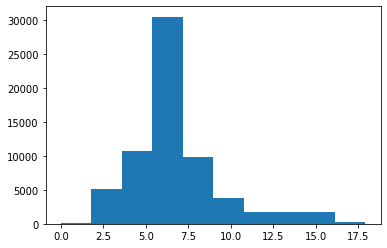

In [52]:
import matplotlib.pyplot as plt
plt.hist(np.log(ioda['score'] + 1))

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [35]:
X = complete.loc[:, ~complete.columns.isin(['is_outage', 'score'])]
y = complete[['is_outage', 'score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [36]:
X_train.head()

,link,title,country,region,date,lead_par,body,time_since_previous_outage,time_since_next_outage,previous_id,next_id
48904,https://www.theguardian.com/media/greenslade/2...,Thai ban on New York Times shows difficulty of...,Thailand,Southeast Asia,2015-09-22 15:40:55+00:00,Newspaper is not first to fall foul of the cou...,Newspaper is not first to fall foul of the cou...,NaT,NaT,NaN,NaN
19025,https://www.theguardian.com/society/2021/nov/0...,Women under 35 face higher risk of breast canc...,Israel,Middle East,2021-11-03 00:01:30+00:00,Analysis of 400 studies found risk of secondar...,Analysis of 400 studies found risk of secondar...,NaT,NaT,NaN,NaN
83957,https://www.nytimes.com/2016/07/29/arts/design...,"For my generation of American gay men, the AID...",NaN,Southeast Asia,2016-07-28 22:07:43+00:00,"For my generation of American gay men, the AID...",Art Review For my generation of American gay m...,NaT,NaT,NaN,NaN
34823,https://www.theguardian.com/global-development...,'We lay like corpses': Bangladesh's 1970s rape...,Myanmar,Southeast Asia,2019-11-05 07:01:13+00:00,Award-winning documentary Rising Silence prese...,Award-winning documentary Rising Silence prese...,NaT,NaT,NaN,NaN
44845,https://www.theguardian.com/politics/2019/sep/...,Johnson under pressure over friend receiving p...,Singapore,Southeast Asia,2019-09-23 18:31:16+00:00,PM stonewalls allegations of conflict of inter...,PM stonewalls allegations of conflict of inter...,NaT,NaT,NaN,NaN


In [38]:
corpus_train = X_train['body']
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(corpus_train.values)

corpus_test = X_test['body']

X_test_tfidf = tfidf.transform(corpus_test.values)

In [37]:
y_train

,is_outage,score
48904,False,0.0
19025,False,0.0
83957,False,0.0
34823,False,0.0
44845,False,0.0
...,...,...
113440,False,0.0
89904,False,0.0
46331,False,0.0
102569,False,0.0


In [12]:
corpus_test

72338     Advertisement Supported by The Jets had an epi...
39330     A survivor’s graphic memoir and a feature film...
23762     Elbow’s Guy Garvey and DJs Dave Haslam and Mar...
103163    Advertisement Supported by With a declining po...
91650     Advertisement Supported by Send any friend a s...
                                ...                        
60670     Advertisement Supported by Send any friend a s...
107608    Advertisement Updated Oct. 28, 2020, 7:38 PM E...
83364     Advertisement Supported by Send any friend a s...
91961     Advertisement By DAVID LEONHARDT and IAN PRASA...
26869     Fury erupts over Republican naming the alleged...
Name: body, Length: 28699, dtype: object

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight={0: 0.04, 1: 0.96})
#test = vectorizer.transform(X_test)
#corpus = vectorizer.fit_transform(corpus)
lr.fit(X=X_train_tfidf, y=y_train['is_outage'].values)

LogisticRegression(class_weight={0: 0.04, 1: 0.96})

In [52]:
lr.score(X_train_tfidf, y_train['is_outage'])

0.9473036226581646

In [47]:
y_pred = lr.predict(X_test_tfidf)

In [46]:
lr.score(X_test_tfidf, y_test)

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [55]:
from sklearn.metrics import f1_score

f1_score(y_test['is_outage'], y_pred)

0.08700102354145343

In [ ]:
lr.score(test_1, y_test)

0.9817763685145824

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

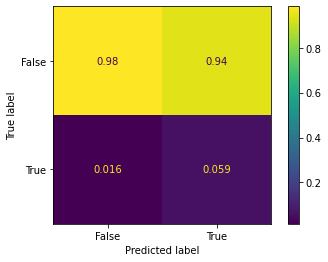

In [51]:
y_pred = lr.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_predictions(y_test['is_outage'], y_pred, normalize='pred')

In [21]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt


lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train_tfidf, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


KeyboardInterrupt: 

c:\Users\Kelvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

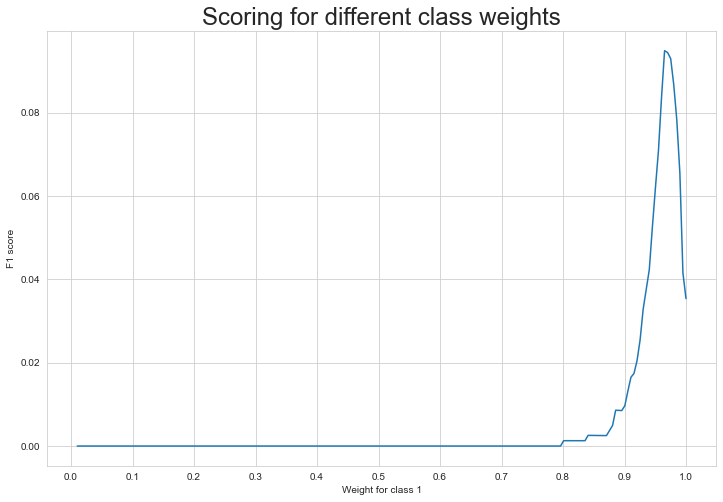

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [ ]:
clf.predict()

In [45]:
pd.merge(complete, ioda_filtered, how='left')

In [43]:
complete

,link,title,country,region,date,lead_par,body,time_since_previous_outage,time_since_next_outage,previous_id,next_id,is_outage
0,https://www.theguardian.com/football/live/2022...,Algeria 0-1 Equatorial Guinea: Africa Cup of N...,Algeria,Middle East,2022-01-16 21:02:24+00:00,Esteban Obiang’s second-half goal delivered a ...,Esteban Obiang’s second-half goal delivered a ...,NaT,NaT,NaN,NaN,False
1,https://www.theguardian.com/football/blog/2022...,Afcon exits of Algeria and Ghana a shock but t...,Algeria,Middle East,2022-01-22 20:00:02+00:00,Debutants Comoros and the Gambia reaching the ...,Debutants Comoros and the Gambia reaching the ...,NaT,NaT,NaN,NaN,False
2,https://www.theguardian.com/world/2021/sep/30/...,Macron in visa cuts row as Algeria summons Fre...,Algeria,Middle East,2021-09-30 16:17:29+00:00,President accused of chasing rightwing votes b...,President accused of chasing rightwing votes b...,NaT,NaT,NaN,NaN,False
3,https://www.theguardian.com/environment/2021/a...,Leaded petrol era ‘officially over’ as Algeria...,Algeria,Middle East,2021-08-30 14:06:07+00:00,UN announcement marks ‘huge milestone for glob...,UN announcement marks ‘huge milestone for glob...,NaT,NaT,NaN,NaN,False
4,https://www.theguardian.com/football/2022/mar/...,Mané’s laser-guided penalty lights up Africa’s...,Algeria,Middle East,2022-03-30 10:10:37+00:00,Egypt’s qualifying defeat was marred by Senega...,Egypt’s qualifying defeat was marred by Senega...,NaT,NaT,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
114791,https://www.nytimes.com/2022/03/29/well/mind/t...,Tips and tricks to get help now.,NaN,Southeast Asia,2022-03-29 15:15:26+00:00,Finding a therapist — let alone one who is a g...,Advertisement Supported by Tips and tricks to ...,NaT,NaT,NaN,NaN,False
114792,https://www.nytimes.com/2022/03/29/movies/will...,One stretch of the broadcast featured a remark...,NaN,Southeast Asia,2022-03-29 16:47:19+00:00,This pandemic is still killing us. The virus a...,Advertisement Supported by critic’s notebook O...,NaT,NaT,NaN,NaN,False
114793,https://www.nytimes.com/2022/03/29/technology/...,While India and Russia have long had close tie...,NaN,Southeast Asia,2022-03-29 17:13:13+00:00,In the days after Russia’s invasion of Ukraine...,Advertisement Supported by While India and Rus...,NaT,NaT,NaN,NaN,False
114794,https://www.nytimes.com/2022/03/29/health/ba2-...,"Scientists have been keeping an eye on BA.2, o...",NaN,Southeast Asia,2022-03-29 19:49:18+00:00,The highly contagious Omicron subvariant known...,Advertisement By Adeel Hassan The highly conta...,NaT,NaT,NaN,NaN,False


In [58]:
from sklearn.linear_model import LinearRegression

linear_regress = LinearRegression().fit(X_train_tfidf, y_train['score'].values)

In [60]:
linear_regress.score(X_train_tfidf, y_train['score'])

0.777520088516348

In [67]:
linear_regress.score(X_test_tfidf, y_test['score'])

-1.8200907986595318

In [62]:
prediction = linear_regress.predict(X_test_tfidf)

In [69]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test['score'], prediction, squared=False)

424273.1984347137